## **Section by Hana – ETL Process: Olist Brazilian E-commerce Dataset**

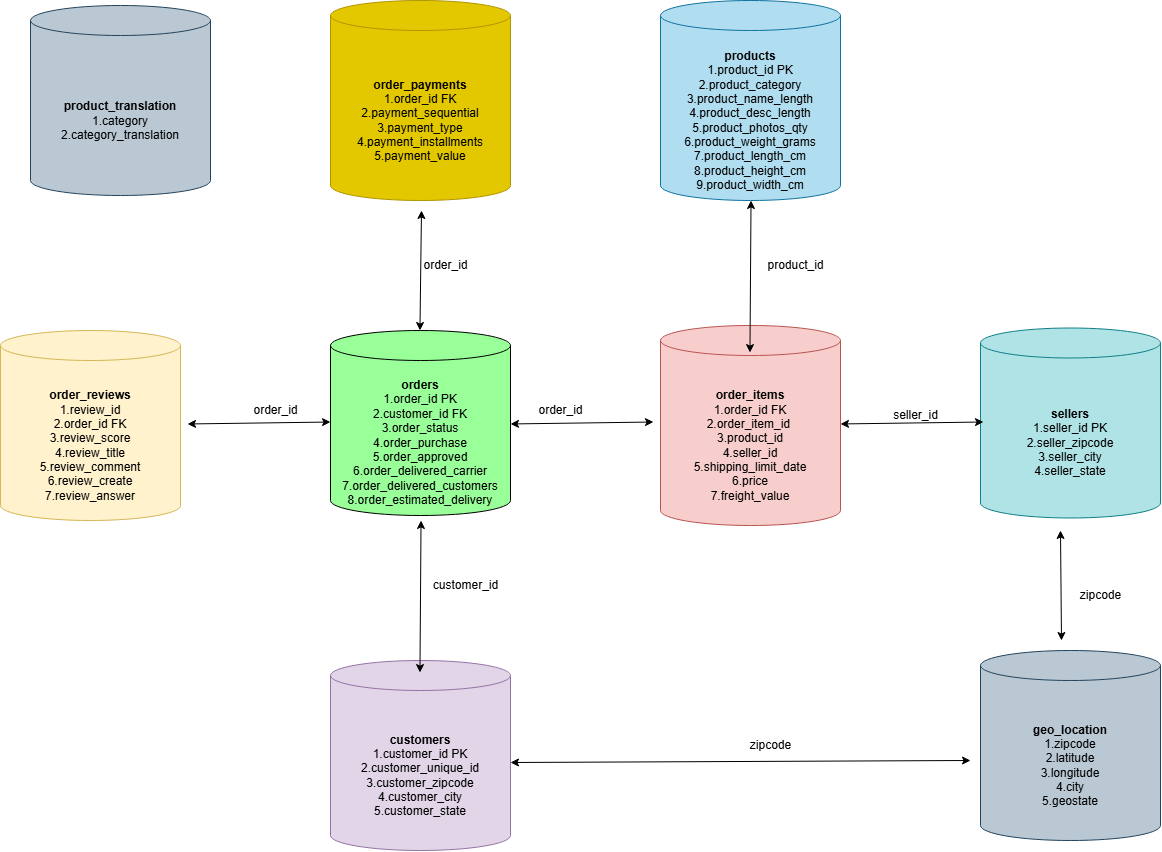
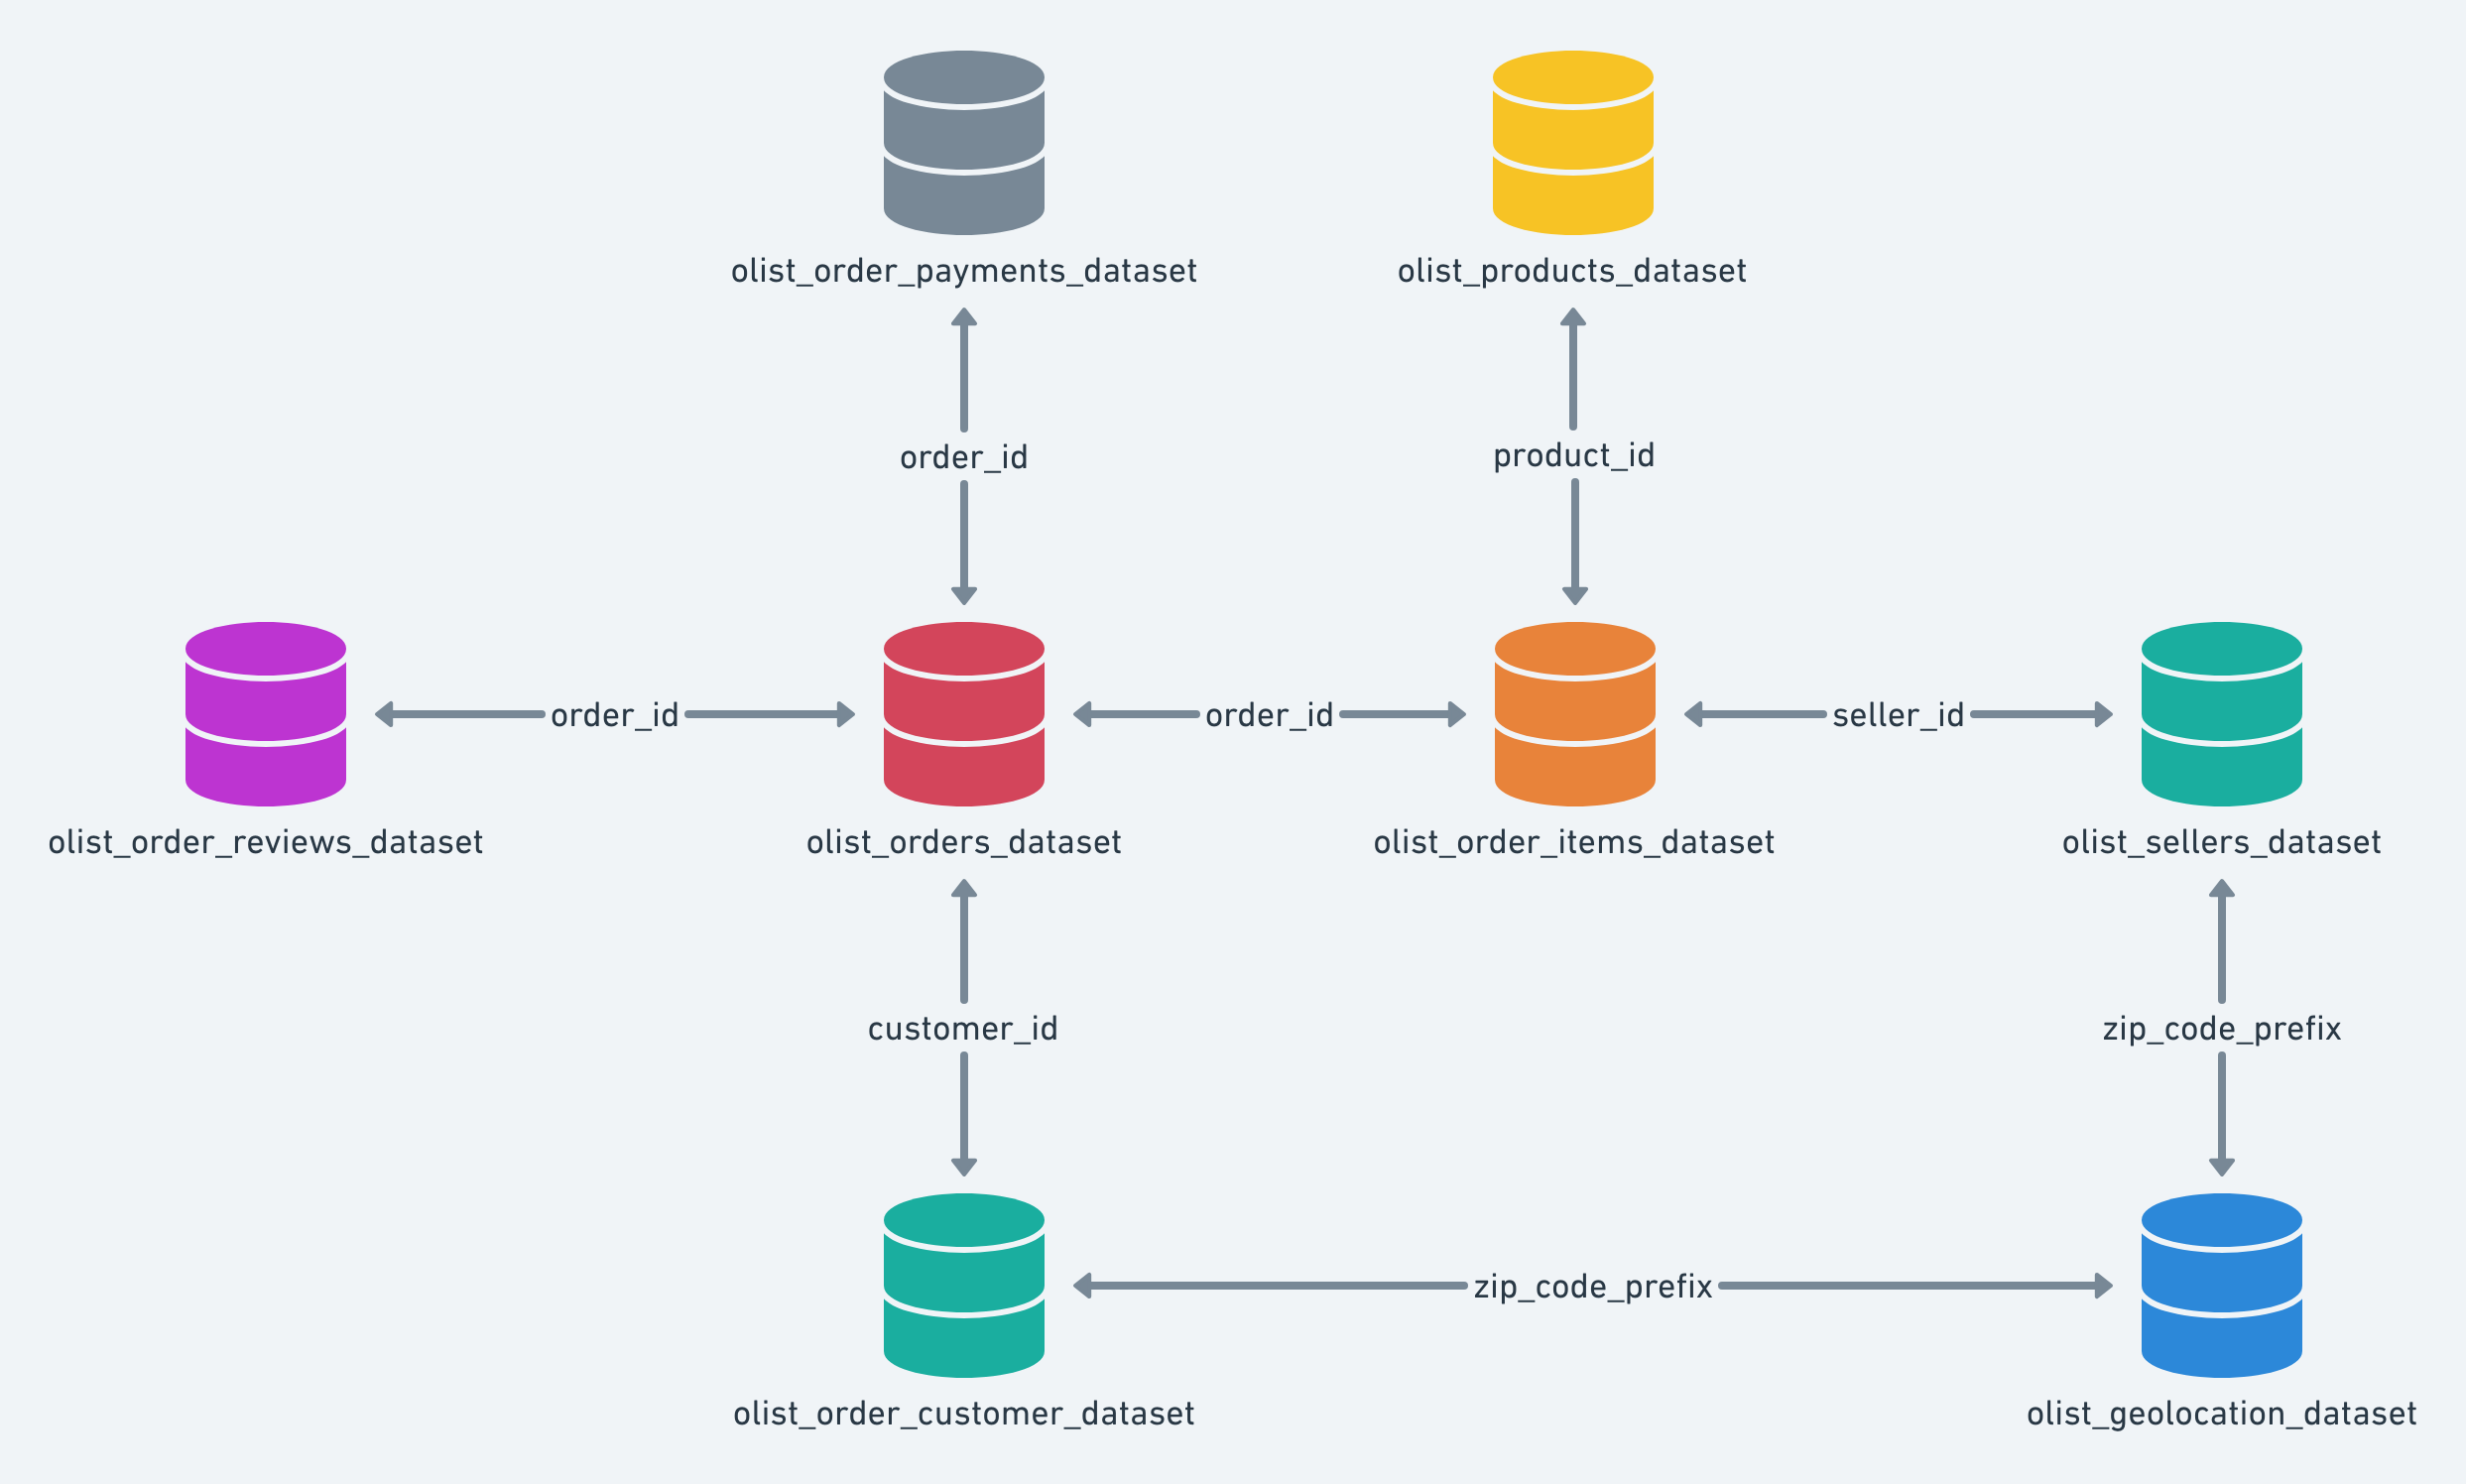

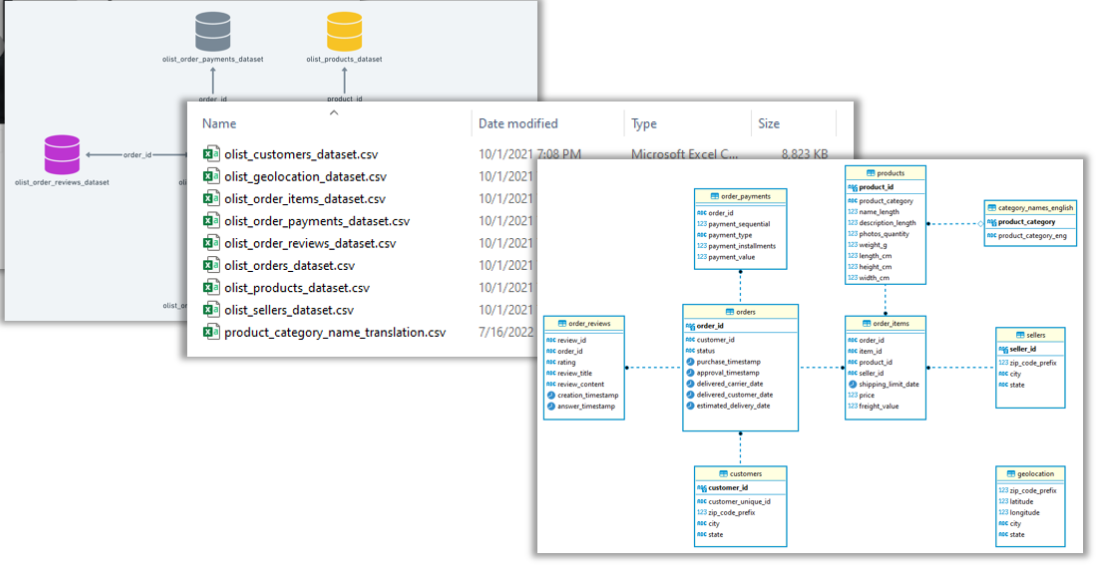

___
Olist is one of Brazil’s largest online marketplaces, allowing small and medium-sized businesses to sell products through a central platform. The Olist dataset contains multiple **relational CSV files** .Each file captures a different aspect of the order lifecycle—customers, sellers, products, payments, and reviews.

### Main Files:
- `orders`: Order-level data with status and timestamps  
- `order_items`: Product-level info per order  
- `products`: Product metadata  
- `payments`: Payment methods and values  
- `reviews`: Customer feedback  
- `customers`: Info about customers — unique customer IDs, ZIP codes, city, and state.  
- `sellers`: Seller details  
- `geo`: ZIP code prefixes( the first 4 digits) to geographic coordinates. It includes latitude, longitude, city, and state for each ZIP code prefix.   
- `category translation`: Product categories in English

### Data Timeframe Selection
- The original dataset spans from 2016-09-04 21:15:19 to 2018-10-17 17:30:18. However, for the purpose of this project, only a slice covering the most recent three months — from 2018-07-17 to 2018-10-17 — has been used for analysis

### Why Relational?
Tables are linked via keys like `order_id`, `product_id`, and `customer_id`, making it ideal for multi-table analysis.

This structure supports a clean **ETL process**:  
→ **Extract** raw files  
→ **Transform** and join data  
→ **Load** for analysis or modeling
___

## 1. **Extraction**

In [1]:
import pandas as pd

# Correct relative paths from notebooks/ to data/raw/
orders = pd.read_csv("../data/raw/olist_orders_dataset.csv")
order_items = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
products = pd.read_csv("../data/raw/olist_products_dataset.csv")
payments = pd.read_csv("../data/raw/olist_order_payments_dataset.csv")
reviews = pd.read_csv("../data/raw/olist_order_reviews_dataset.csv")
customers = pd.read_csv("../data/raw/olist_customers_dataset.csv")
sellers = pd.read_csv("../data/raw/olist_sellers_dataset.csv")
geo = pd.read_csv("../data/raw/olist_geolocation_dataset.csv")
categories = pd.read_csv("../data/raw/product_category_name_translation.csv")


#### *A. Initial Data Inspection*

#### orders

In [41]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


| Column Name                   | Description                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| order_id                      | Unique identifier for each order.                                           |
| customer_id                   | Links each order to a customer from the customers table.                   |
| order_status                  | Current status of the order (e.g., delivered, shipped, canceled).          |
| order_purchase_timestamp      | When the order was placed by the customer.                                 |
| order_approved_at             | When the payment was approved.                                             |
| order_delivered_carrier_date  | When the seller handed the package to the carrier.                         |
| order_delivered_customer_date | When the customer received the order.                                      |
| order_estimated_delivery_date | Estimated delivery date given at the time of purchase.                     |


##### order_items

In [42]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


| Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| order_id            | Unique identifier for each order (links to orders table).                   |
| order_item_id       | The item number within the order (1 for the first item, 2 for the second…). |
| product_id          | Unique ID for the purchased product (links to products table).              |
| seller_id           | Unique ID of the seller responsible for this item (links to sellers table). |
| shipping_limit_date | Deadline for the seller to ship the item.                                   |
| price               | Price paid for the item (excluding shipping).                               |
| freight_value       | Shipping fee charged for the item.                                          |


#### products

In [43]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


| Column Name                    | Description                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| `product_id`                  | Unique identifier for each product.                                        |
| `product_category_name`       | Category name of the product (e.g., `perfumaria`, `moveis_decoracao`).    |
| `product_name_lenght`         | Number of characters in the product's name.                                |
| `product_description_lenght`  | Number of characters in the product's description.                         |
| `product_photos_qty`          | Number of photos provided for the product.                                 |
| `product_weight_g`            | Weight of the product in grams.                                            |
| `product_length_cm`           | Length of the product in centimeters.                                      |
| `product_height_cm`           | Height of the product in centimeters.                                      |
| `product_width_cm`            | Width of the product in centimeters.                                       |


#### Payments

In [44]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


| Column Name            | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `order_id`             | Unique identifier linking to the `orders` table.                            |
| `payment_sequential`   | tells us how many payment types were used for a single order. |
| `payment_type`         | Type of payment used (e.g., `credit_card`, `boleto`, `voucher`, `debit_card`). |
| `payment_installments` | tells us how many times a payment is split, like "3 monthly payments. |
| `payment_value`        | Amount paid by the customer (in BRL – Brazilian Real).(price + freight_value)|


#### Reviews

In [45]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



| Column Name              | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| `review_id`              | Unique identifier for the review                                            |
| `order_id`               | ID of the order being reviewed (connects to orders table)                   |
| `review_score`           | Score given by the customer (1 to 5 stars)                                  |
| `review_comment_title`   | Optional title for the review (short summary)                |
| `review_comment_message` | Detailed review message provided by the customer                            |
| `review_creation_date`   | Date when the customer submitted the review                                 |
| `review_answer_timestamp`| Timestamp when Olist responded or processed the review                      |

#### Customers

In [46]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



| Column Name                | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| `customer_id`              | A unique identifier for a **customer account**, consistent across orders.   |
| `customer_unique_id`       | A hashed version of a real person’s ID, consistent across duplicate accounts
|                             | or email  changes.|
| `customer_zip_code_prefix` | First digits of the customer's ZIP code                                     |
| `customer_city`            | City of the customer                                                        |
| `customer_state`           | State abbreviation where the customer resides (e.g., SP, RJ)               |

#### Sellers

In [47]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


| Column Name             | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| `seller_id`             | Unique identifier for each seller.                                          |
| `seller_zip_code_prefix`| First 5 digits of the seller's ZIP code, used for regional grouping.        |
| `seller_city`           | City where the seller is located.                                           |
| `seller_state`          | Two-letter abbreviation of the seller's state (e.g., SP = São Paulo).       |

#### Geo

In [48]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


| Column Name                 | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| `geolocation_zip_code_prefix` | First 5 digits of the ZIP code, used to group geographic locations.       |
| `geolocation_lat`           | Latitude coordinate of the location.                                       |
| `geolocation_lng`           | Longitude coordinate of the location.                                      |
| `geolocation_city`          | City of the geographic location.                                           |
| `geolocation_state`         | Two-letter state abbreviation of the geographic location (e.g., SP, RJ).  |


#### Categories

In [49]:
categories.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


| product_category_name             | product_category_name_english     |
|----------------------------------|-----------------------------------|
| beleza_saude                     | health_beauty                     |
| informatica_acessorios           | computers_accessories             |
| automotivo                       | auto                              |
| cama_mesa_banho                  | bed_bath_table                    |
| moveis_decoracao                 | furniture_decor                   |
| ...                              | ...                               |

In [50]:
datasets = {
    "Orders": orders,
    "Order Items": order_items,
    "Products": products,
    "Payments": payments,
    "Reviews": reviews,
    "Customers": customers,
    "Sellers": sellers,
    "Geolocation": geo,
    "Category Translation": categories
}
for name, df in datasets.items():
    print(f"\n{name} Info:")
    print(df.info())


Orders Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Order Items Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_i

___
### *B. Initial Inspection Observations*

From the initial `.info()` checks across the Olist datasets, we observe the following:

- **Data Volume**: Most datasets contain tens of thousands of entries, with `geolocation` being the largest (~1 million rows) and `category translation` the smallest (71 rows).
- **Data Types**: Many columns are stored as `object` type, particularly those representing IDs and dates. This may require type conversion (e.g., to `datetime`) during preprocessing.
- **Missing Data**:
  - The `orders` dataset has some missing timestamps in delivery-related fields.
  - The `products` dataset has a few missing values in product attributes.
  - The `reviews` dataset has many missing values in comment titles and messages, which may be optional fields.
- **Relational Structure**: 
  - Shared keys like `order_id`, `product_id`, `customer_id`, and `seller_id` across tables suggest strong relational integrity.
  - This supports potential joins to create enriched views for further analysis.

These findings guide us to perform data cleaning and transformations in the upcoming ETL steps.
____


## **2. Transformaiton**

### *A. Conversion of date columns to `datetime` type for purpose of filtering*

___
Identify all datetime-related columns across all DataFrames.
___

In [51]:
# List all DataFrames in a dictionary
dfs = {
    "Orders": orders,
    "Order Items": order_items,
    "Products": products,
    "Payments": payments,
    "Reviews": reviews,
    "Customers": customers,
    "Sellers": sellers,
    "Geolocation": geo,
    "Category Translation": categories
}

# Loop through and check for datetime-like columns
for name, df in dfs.items():
    date_cols = [col for col in df.columns if 'date' in col.lower() or 'timestamp' in col.lower()]
    if date_cols:
        print(f"{name} has date-related columns: {date_cols}")


Orders has date-related columns: ['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
Order Items has date-related columns: ['shipping_limit_date']
Reviews has date-related columns: ['review_creation_date', 'review_answer_timestamp']


___
Convert relevant date-related columns from string (object) to datetime64[ns] format for proper time-based analysis and filtering.
____
```python

In [52]:
# Orders table
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Order Items table
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

# Reviews table
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])


___
Verify / Check the data types of each DataFrame to ensure successful conversion using .dtypes.
____
```python


In [53]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [54]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [55]:
reviews.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

### *B. Extracting Latest 3-Month Data Snapshot from Orders and Related Tables*

In [56]:
# Step 1: Define latest 3-month window
latest_date = orders['order_purchase_timestamp'].max()
three_months_ago = latest_date - pd.DateOffset(months=3)

# Step 2: Filter orders
filtered_orders = orders[
    orders['order_purchase_timestamp'] >= three_months_ago
].copy()

# Step 3: Get list of order_ids
filtered_order_ids = filtered_orders['order_id'].unique()

# Step 4: Filter related tables using order_id
filtered_order_items = order_items[
    order_items['order_id'].isin(filtered_order_ids)
].copy()

filtered_payments = payments[
    payments['order_id'].isin(filtered_order_ids)
].copy()

filtered_reviews = reviews[
    reviews['order_id'].isin(filtered_order_ids)
].copy()

# Step 5: Filter customers using customer_id from filtered_orders
filtered_customers = customers[
    customers['customer_id'].isin(filtered_orders['customer_id'])
].copy()

# Step 6: Filter products using product_id from filtered_order_items
filtered_products = products[
    products['product_id'].isin(filtered_order_items['product_id'])
].copy()

# Step 7: Filter sellers using seller_id from filtered_order_items
filtered_sellers = sellers[
    sellers['seller_id'].isin(filtered_order_items['seller_id'])
].copy()

# Step 8: Filter category translation using product_category_name from filtered_products
filtered_categories = categories[
    categories['product_category_name'].isin(filtered_products['product_category_name'])
].copy()

# Step 9: Filter geolocation using both customer and seller zip codes
customer_zip_codes = filtered_customers['customer_zip_code_prefix'].unique()
seller_zip_codes = filtered_sellers['seller_zip_code_prefix'].unique()
all_zip_codes = pd.concat([
    pd.Series(customer_zip_codes),
    pd.Series(seller_zip_codes)
]).unique()

filtered_geo = geo[
    geo['geolocation_zip_code_prefix'].isin(all_zip_codes)
].copy()

___
- To focus the analysis on the most recent three months of activity, the datasets were filtered based on the order_purchase_timestamp field. Orders falling within this time window were retained, and all other tables were subsequently filtered to include only the relevant records linked to these recent orders.

- This filtering approach ensures consistency across all datasets. It also preserves the relational integrity necessary for downstream merging, analysis, and visualization. Redundant(unisng unique()) and unrelated entries were excluded, allowing for a cleaner, more focused subset of the data that reflects the latest consumer behavior and transactions
____
```python

### *C.Merging All Filtered Data Based on Recent Orders (Last 3 Months)*


In [57]:
# Start from filtered_orders to keep all recent orders
df = filtered_orders.copy()

# Merge with order_items (may create NaNs if no items for some orders indicating maay be incomplete or canceled orders)
df = df.merge(filtered_order_items, on='order_id', how='left')

# Merge with payments and reviews (still left join to retain all orders)
df = df.merge(filtered_payments, on='order_id', how='left')
df = df.merge(filtered_reviews, on='order_id', how='left')

# Merge with customers using customer_id
df = df.merge(filtered_customers, on='customer_id', how='left')

# Merge with products and sellers (based on order_items info)
df = df.merge(filtered_products, on='product_id', how='left')
df = df.merge(filtered_sellers, on='seller_id', how='left')

# Merge with product category translation
df = df.merge(filtered_categories, on='product_category_name', how='left')

# --------- Optional: Add geolocation info ---------

# 1. Customer geolocation: average lat/lng by zip
geo_avg_customer = filtered_geo.groupby('geolocation_zip_code_prefix')[
    ['geolocation_lat', 'geolocation_lng']
].mean().reset_index()

geo_avg_customer.rename(columns={
    'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
    'geolocation_lat': 'customer_lat',
    'geolocation_lng': 'customer_lng'
}, inplace=True)

df = df.merge(geo_avg_customer, on='customer_zip_code_prefix', how='left')

# 2. Seller geolocation: average lat/lng by zip
geo_avg_seller = filtered_geo.groupby('geolocation_zip_code_prefix')[
    ['geolocation_lat', 'geolocation_lng']
].mean().reset_index()

geo_avg_seller.rename(columns={
    'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
    'geolocation_lat': 'seller_lat',
    'geolocation_lng': 'seller_lng'
}, inplace=True)

df = df.merge(geo_avg_seller, on='seller_zip_code_prefix', how='left')


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11777 entries, 0 to 11776
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       11777 non-null  object        
 1   customer_id                    11777 non-null  object        
 2   order_status                   11777 non-null  object        
 3   order_purchase_timestamp       11777 non-null  datetime64[ns]
 4   order_approved_at              11704 non-null  object        
 5   order_delivered_carrier_date   11584 non-null  datetime64[ns]
 6   order_delivered_customer_date  11499 non-null  datetime64[ns]
 7   order_estimated_delivery_date  11777 non-null  datetime64[ns]
 8   order_item_id                  11684 non-null  float64       
 9   product_id                     11684 non-null  object        
 10  seller_id                      11684 non-null  object        
 11  shipping_limit_

In [59]:
print("Final Filtered and Merged df:")
print("Earliest:", df['order_purchase_timestamp'].min())
print("Latest:", df['order_purchase_timestamp'].max())

Final Filtered and Merged df:
Earliest: 2018-07-17 17:32:09
Latest: 2018-10-17 17:30:18


___
- After filtering the datasets to retain only the relevant records from the most recent three months, multiple data tables were merged to form a single, comprehensive DataFrame.

- This merging process was performed using key identifiers such as order_id, customer_id, product_id, and seller_id to preserve the relational structure between orders, customers, products, payments, reviews, sellers, and geolocation data.

- As a result, a unified dataset with 11,777 entries and 44 columns was created, containing detailed transaction-level information suitable for in-depth analysis. Temporal coverage in this final dataset ranges from 2018-07-17 to 2018-10-17. Missing values in some columns reflect real-world data gaps such as unreviewed orders or incomplete delivery records.
___

### *D. Check for duplicates*

In [60]:
df.duplicated().sum()

0

___
- No duplicate entries were found in the final merged DataFrame, ensuring data integrity for analysis.
____
```python

### *E. Check for Missing Values and fill accordingly*

In [61]:
# Percentage of missing values
missing_percent = (df.isnull().mean() * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

missing_summary

,Missing Values,Percentage
review_comment_title,7418,62.99
review_comment_message,7166,60.85
order_delivered_customer_date,278,2.36
order_delivered_carrier_date,193,1.64
product_category_name_english,173,1.47
product_category_name,156,1.32
product_photos_qty,156,1.32
product_description_lenght,156,1.32
product_name_lenght,156,1.32
seller_lat,104,0.88


#### Remove columns with more than 50% missing values

In [62]:
# Remove columns with more than 50% missing values
threshold = 0.5  # 50%
df = df.loc[:, df.isnull().mean() <= threshold]

#### Fill datetime columns with a related datetime column (if known), else use forward fill

In [63]:
import warnings

# Suppress all warnings 
warnings.filterwarnings('ignore')

# Fill datetime columns with a related datetime column (if known), else use forward fill
datetime_cols = df.select_dtypes(include='datetime64[ns]').columns

for col in datetime_cols:
    if col == 'order_approved_at':
        df[col] = df[col].fillna(df['order_purchase_timestamp'])  # domain-specific logic
    else:
        df[col] = df[col].fillna(method='ffill')  # forward fill as default for datetime

#### Fill missing numeric values with mean or median using skewness check

In [64]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:  # only process columns with missing values
        skewness = df[col].skew()
        if abs(skewness) > 1:  # high skew: use median
            df[col] = df[col].fillna(df[col].median())
        else:  # low or moderate skew: use mean
            df[col] = df[col].fillna(df[col].mean())

#### Fill object (categorical) columns with mode

In [65]:
# Fill object (categorical) columns with mode
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    if df[col].isnull().any():
        mode_value = df[col].mode().iloc[0] if not df[col].mode().empty else 'unknown'
        df[col] = df[col].fillna(mode_value)


#### Verify/Check the missing values after filling

In [66]:
df.isnull().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
product_name_lenght              0
product_description_

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11777 entries, 0 to 11776
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       11777 non-null  object        
 1   customer_id                    11777 non-null  object        
 2   order_status                   11777 non-null  object        
 3   order_purchase_timestamp       11777 non-null  datetime64[ns]
 4   order_approved_at              11777 non-null  object        
 5   order_delivered_carrier_date   11777 non-null  datetime64[ns]
 6   order_delivered_customer_date  11777 non-null  datetime64[ns]
 7   order_estimated_delivery_date  11777 non-null  datetime64[ns]
 8   order_item_id                  11777 non-null  float64       
 9   product_id                     11777 non-null  object        
 10  seller_id                      11777 non-null  object        
 11  shipping_limit_

### *F. Add Calculated Fields*

#### Purchase Frequency per Customer

In [68]:
# Step 1: Recalculate purchase frequency
purchase_freq = df.groupby('customer_unique_id')['order_id'].nunique()

# Step 2: Map it back to df
df['purchase_frequency'] = df['customer_unique_id'].map(purchase_freq)

# Step 3: Double-check it looks right before exporting
print(df['purchase_frequency'].value_counts().sort_index())



purchase_frequency
1    11447
2      272
3       30
4       28
Name: count, dtype: int64


___
To understand **how often each customer makes a purchase**, **Purchase frequency** based on unique order IDs associated with each customer was calculated.

- Helps identify **repeat customers** vs. **one-time buyers**
- Enables **customer segmentation** based on loyalty or shopping behavior
- Useful for **marketing strategies**, and **customer lifetime value** analysis
___


### *G. Handle Outliers* 

In [69]:
import numpy as np

# Step 1: Select numeric columns excluding 'purchase_frequency' and 'square'
exclude_cols = ['purchase_frequency', 'review_score']
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Step 2: IQR-based outlier capping
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))


___
##### Handling Outliers Using the IQR Method
This code handles outliers in all numeric columns using the **IQR (Interquartile Range)** method by **capping** them:

- Outliers **below the lower bound** are replaced with the **lower bound value**
- Outliers **above the upper bound** are replaced with the **upper bound value**
- Values **within bounds** are left unchanged


##### Why It's Used
- Reduces noise in the dataset without removing rows  
- Keeps extreme values from skewing models or visualizations  
- Maintains data size while improving quality
____
```python


In [70]:
print(df['purchase_frequency'].value_counts().sort_index())

purchase_frequency
1    11447
2      272
3       30
4       28
Name: count, dtype: int64


### *H. Standardize Formats & Remove Noise*

##### Ensuring consistent formats across all object (string) columns

In [71]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

___
This code cleans all object (text) columns by applying three transformations:

- **`astype(str)`**:  
  Ensures the column is treated as a string (even if some values are not).
  The main reason we're converting object columns to str is because the rest of functions
  are .str accessor methods that only work safely and consistently on string data.

- **`.str.lower()`**:  
  Converts all text to **lowercase**.  
  Example: `'Delivered'` → `'delivered'`  
  Useful for consistency during comparison, grouping, etc.

- **`.str.strip()`**:  
  Removes **leading and trailing whitespace**.  
  Example: `' shipped '` → `'shipped'`  
  Prevents issues where `'shipped '` ≠ `'shipped'`.

##### Why It’s Important

- Makes data **uniform and consistent**
- Prevents errors in **filtering, grouping, or merging**
___

##### Datatype Conversion

In [72]:
df['order_item_id'] = df['order_item_id'].astype(str)
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(str)

In [73]:
columns_to_int = [
    'review_score',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
]

# Convert using astype after handling any potential NaN or float values
for col in columns_to_int:
    df[col] = df[col].round().astype('Int64')  # 'Int64' allows for missing values

#### Verify/Check the data types of each DataFrame to ensure successful conversion.

In [74]:
print(df['order_item_id'].dtype)
print(df['seller_zip_code_prefix'].dtype)

object
object


In [75]:
# view selected columns' data types
columns_to_int = [
    'review_score',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
]

print(df[columns_to_int].dtypes)

review_score                  Int64
product_name_lenght           Int64
product_description_lenght    Int64
product_photos_qty            Int64
dtype: object


In [76]:
# Step 4: Export to CSV
df.to_csv('../data/transformed/transformed_data.csv', index=False)

## **3. Loading**

In [77]:
import pandas as pd

# Load the transformed CSV data
df_transformed = pd.read_csv('../data/transformed/transformed_data.csv')

In [78]:


# Save the DataFrame as a Parquet file
df_transformed.to_parquet('../data/final/loaded_data.parquet, index=False')

# Read and preview the Parquet file from the correct path
preview_df = pd.read_parquet('../data/final/loaded_data.parquet')
preview_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,customer_lat,customer_lng,seller_lat,seller_lng,purchase_frequency
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,19.0,31570.0,belo horizonte,sp,perfumery,-16.515006,-44.660711,-19.902360,-43.980427,1
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,21.0,14840.0,guariba,sp,auto,-16.745150,-48.514783,-21.363502,-48.229601,1
2,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,1.0,10adb53d8faa890ca7c2f0cbcb68d777,...,16.0,14940.0,ibitinga,sp,bed_bath_table,-23.713190,-46.687407,-21.757321,-48.829744,1
3,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1.0,e99d69efe684efaa643f99805f7c81bc,...,25.0,14910.0,tabatinga,sp,stationery,-23.531732,-47.499804,-21.737063,-48.687601,1
4,b276e4f8c0fb86bd82fce576f21713e0,cf8ffeddf027932e51e4eae73b384059,delivered,2018-07-29 23:34:51,2018-07-29 23:45:15,2018-07-30 14:43:00,2018-07-31 22:48:50,2018-08-06,1.0,c6c1f263e076bd9c1f1640250a5d0c29,...,16.0,13030.0,campinas,sp,perfumery,-22.740602,-47.375821,-22.924970,-47.074284,1


___
#### Loading the Transformed Data:
We read the transformed dataset from the CSV file located in `data/transformed/transformed_data.csv` using `pandas.read_csv()`.

#### Saving as Parquet:
We created a new directory called `data/final/` if it didn't already exist using `os.makedirs()` with `exist_ok=True`.

The DataFrame was then saved as a Parquet file (`loaded_data.parquet`) using `df.to_parquet()`. This format is preferred for analytics workflows due to its:

- Smaller file size (compared to CSV)  
- Faster read/write times  
- Schema support and optimized columnar storage  

#### Reading and Previewing:
We confirmed the integrity of the saved Parquet file by reading it back with `pd.read_parquet()` and printing the first few rows using `.head()`.
___
